## Mini projet Optimisation - groupe 5

### I. Etude du problème d'optimisation

$\underline{Question~ 1}$ 

La dynamique de charge est donnée par : $Q_{j,i+1} = Q_{j,i} + \Delta t \beta_j P_{j,i}$

Le terme $\beta_j P_{j,i}$ correspond au taux d'accroissement de la charge du véhicule, il est homogène à puissance/tension. Il dépend de la puissance délivrée par la station de charge avec le terme $P_{j,i}$ (homogène à une puissance), et du rendement de charge du véhicule avec le terme $\beta_j$ (inverse d'une tension).
Le produit $\beta_j P_{j,i}$ correspond donc à la puissance délivrée par la station au véhicule j. 

On a donc que la charge $Q_{j,i+1}$ du véhicule j après un temps $\Delta t$ de recharge est égale à la charge initiale $Q_{j,i}$ plus la puissance délivrée par la station au véhicule j $\beta_j P_{j,i}$ multiplié par le temps de charge $\Delta t$.


$$
$$

$\underline{Question~ 2}$

On assimile la fonction f au coût électrique de charge donnée par 
$$
\Delta t \sum_{j=1}^{N_v} \sum_{i=0}^{N} c_{i} P_{j, i}
$$ 
Posons $P = (P_{j,i})_{j \in \llbracket 1, N_{v} \rrbracket
\\
i \in \llbracket 0, N \rrbracket }$ 

Les variables de décision sont les $P_{j,i}$, coefficients de la matrice P. On a donc $N_{v}(N+1)$ variables de décision.

On a donc 
$$
f(P) = \Delta t \sum_{j=1}^{N_v} \sum_{i=0}^{N} c_{i} P_{j, i}
$$

L'objectif est de minimiser cette fonction $f$ en fonction des variables $P_{j,i}$.

De plus les conditions à respecter sont : 
- la puissance fournie par la station est limitée : 
$$
\sum_{j=1}^{N_{v}} P_{j, i} - \bar{P} \leq 0 , \quad i=0, \ldots, N
$$
Donc 
$$
c_{in}(P) = \sum_{j=1}^{N_{v}} P_{j, i} - \bar{P} \leq 0
$$
- Les voitures sont chargées à la fin du temps de charge et ont une certaine charge à l'arrivée :
$$
\sum_{i=i_{j0}}^{i_{jf}}P_{j,i}= \frac{1}{\Delta t \beta_j}(\bar{Q}_j-Q_j^{in}) , \quad j \in {1,\ldots,N_v}
$$
D'où 
$$
c_{eq}(P) = \sum_{i=i_{j0}}^{i_{jf}}P_{j,i}- \frac{1}{\Delta t \beta_j}(\bar{Q}_j-Q_j^{in}) = 0
$$



$$

$$

$\underline{Question~ 3}$

Soit $P = (P_{j,i})_{j \in \llbracket 1, N_{v} \rrbracket
\\
i \in \llbracket 0, N \rrbracket }$
$R = (R_{j,i})_{j \in \llbracket 1, N_{v} \rrbracket
\\
i \in \llbracket 0, N \rrbracket }$
$$
\lambda \in [0,1]
$$

On a 
$$
f(\lambda P+(1-\lambda) R) = \Delta t \sum_{j=1}^{N_v} \sum_{i=0}^{N} c_{i}\left(\lambda P_{j,i}+(1-\lambda) R_{j,i}\right)
\\
= \lambda \Delta t \sum_{j=1}^{N_v} \sum_{i=0}^{N} c_{i} P_{j,i} + (1 - \lambda) \Delta t \sum_{j=1}^{N_v} \sum_{i=0}^{N} c_{i} R_{j,i}
$$
On a donc 
$$
f(\lambda P+(1-\lambda) R) = \lambda f(P) + (1 - \lambda) f(R)
$$

Le problème est donc linéaire et convexe, il appartient à la famille des problèmes linéaires.


$\\$

$\underline{Question ~ 4}$


On suppose que 

$
\bar{Q_j} = \bar{Q} 
$ 
et que $\beta_j=\beta
$

### Importations

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy


On calcule $\bar{Q}$ à l'aide des données du fichier .csv.

In [2]:
data=pd.read_csv("data_battery.csv")

In [3]:
t=299.42589161461
delta_SOC=0.631646164917691-0.255189648045067
sum=np.sum(np.array(data["I[A]"]))
Q_bar=-sum*t/3600/delta_SOC

print(f"En {t/60} minutes, la batterie s'est déchargée de {-sum*t/3600} Ah ce qui correspond à {delta_SOC*100}% de la charge totale. Donc la charge totale est de {-sum*t/3600/delta_SOC} Ah.")

En 4.990431526910167 minutes, la batterie s'est déchargée de 15.566128191874649 Ah ce qui correspond à 37.6456516872624% de la charge totale. Donc la charge totale est de 41.349073516348575 Ah.


Donc 

$$
\bar{Q}=41,3  Ah 
$$


$\\$

$\underline{Question ~ 5}$


Formulons le problème des moindres carrés permettant de déterminer $\beta$.

On a déjà dans cet essai $N_v = 1$

La relation de la dynamique de charge se réduit donc à 
$$
Q_{i+1}=Q_i+\Delta t \beta P_i=Q_i+\Delta t \beta U_{sec}I_i
$$

On cherche donc à trouver $\beta$ qui minimise: 
$$
||\Delta Q- \Delta t  U_{sec}I \beta||^2=\sum_{i=0}^{N-1}(Q_{i+1}-(Q_i + \Delta t \beta U_{sec}I_i))^2
$$

Ou $\Delta Q =(Q_{i+1}-Q_i)_{i \in \llbracket 0~;~ N-1 \rrbracket}$ et $I=(I_i)_{i \in \llbracket 0~;~ N-1 \rrbracket}$

In [4]:
Qmax=50
a=np.array(1/3600 *230*data["I[A]"])[:-1]
Q=np.array(data["SOC [%]"]*Qmax)[:-1] #on utilise la valeur de Q_bar= 50 Ah donnée dans l'énoncé question 7
Q_plus=np.array(data["SOC [%]"]*Qmax)[1:]
b=Q_plus-Q
beta,residuals,rank, s=np.linalg.lstsq(a[:,np.newaxis],b, rcond=None)
beta,residuals

(array([1.49904513]), array([1.9448285]))

Sans traitement du signal, on obtient une valeur de $$ \beta=1,5 V^{-1} $$

On représente désormais le resultat de la méthode des moindres carrés sur le même graphe que les points de la data originale.

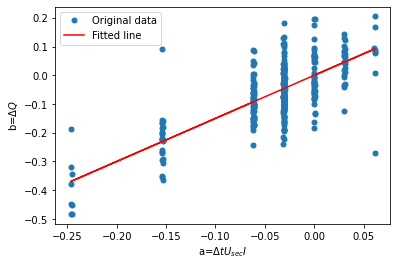

In [5]:
_ = plt.plot(a, b, 'o', label='Original data', markersize=5)
_ = plt.plot(a, beta*a  , 'r', label='Fitted line')
plt.xlabel(r"a=$ \Delta t U_{sec} I$")
plt.ylabel(r"b=$ \Delta Q$")
_ = plt.legend()
plt.show()

Tentons d'éliminer le bruit des signaux. On va tout d'abord construire un filtre à l'aide de scipy.signal.ellip, puis on va appliquer deux méthodes différentes de la bibliothèque scipy.signal afin de filtrer le signal b: la méthode Gustafsson et la méthode du padding.

In [6]:

c, d = scipy.signal.ellip(4, 0.01, 120, 0.125)

fgust = scipy.signal.filtfilt(c, d, b, method="gust")
fpad = scipy.signal.filtfilt(c, d, b, padlen=50)
plt.plot(b, 'k-', label='input')
plt.plot(fgust, 'b-', linewidth=4, label='gust')
plt.plot(fpad, 'c-', linewidth=1.5, label='pad')
plt.xlabel("Time [s]")
plt.ylabel(r"b=$ \Delta Q$")
plt.legend(loc='best')
plt.show()



AttributeError: module 'scipy' has no attribute 'signal'

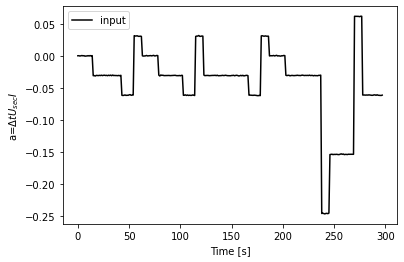

In [ ]:

c1, d1 = scipy.signal.ellip(4, 0.01, 120, 0.125)

fgust1 = scipy.signal.filtfilt(c1, d1, a, method="gust")
fpad1 = scipy.signal.filtfilt(c1, d1, a, padlen=50)
plt.plot(a, 'k-', label='input')
#plt.plot(fgust, 'b-', linewidth=4, label='gust')
#plt.plot(fpad, 'c-', linewidth=1.5, label='pad')
plt.xlabel("Time [s]")
plt.ylabel(r"a=$ \Delta t U_{sec} I$")
plt.legend(loc='best')
plt.show()

Après analyse des résultats, la courbe de a est très peu bruitée, on peut donc conserver a dans la méthode des moindres carrés. Cependant, on peut prendre la méthode de Gustafsson pour b. 

[1.46749468] [0.24744639]


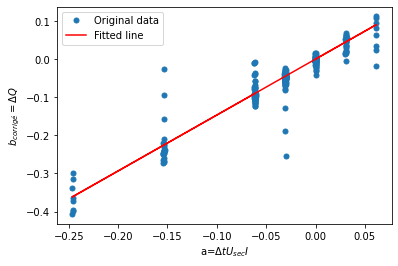

In [ ]:
beta1,residuals1,rank1, s1=np.linalg.lstsq(a[:,np.newaxis],fgust, rcond=None)
print(beta1,residuals1)
_ = plt.plot(a, fgust, 'o', label='Original data', markersize=5)
_ = plt.plot(a, beta1*a  , 'r', label='Fitted line')
plt.xlabel(r"a=$ \Delta t U_{sec} I$")
plt.ylabel(r"$b_{corrigé}= \Delta Q$")
_ = plt.legend()
plt.show()


Après filtrage, on remarque que l'erreur résiduelle a beaucoup baissé et se rapproche de 0. La valeur de $\beta$ a un peu évolué pour atteindre $$ \beta_1= 1.47 V^{-1}$$

$\\$

$\underline{Question ~ 6}$


Le problème considéré est un problème d'optimisation différentiable sous contrainte de dimension finie. Le problème étant de plus linéaire et les contraintes affines, on peut transformer l'expression pour pouvoir utiliser la méthode du simplexe ou de la descente de gradient.

$\\$

$\underline{Question ~ 7}$


### Données

In [ ]:
ccr=1
cpl=3/2
Qbar=50
Pbar=5
t0=17
delta_t=0.25
N=24*4+1
Nv=2
T=[t0+i*delta_t for i in range(N)]
Q1_i=0.3*Qbar
Q2_i=0.5*Qbar
t1_i=18
t2_i=18.5
t1_f=32
t2_f=33

On va mettre en place la méthode du simplexe. 
Pour cela écrivons le problème initial comme un problème LP.

On a déjà $N_v =2$ ce qui va simplifier l'expression du problème.

$$

f(P)= \Delta t \sum_{i=0}^{N}c_i P_{1,i} + \Delta t \sum_{i=0}^{N}c_i P_{2,i}= \Delta t c^T (P_1 + P_2)= \Delta t \begin{pmatrix}
c \\
c
\end{pmatrix}^T \begin{pmatrix}
P_1 \\
P_2
\end{pmatrix}

$$

Le problème devient donc la minimisation de $  \Delta t \begin{pmatrix}
c \\
c
\end{pmatrix}^T \begin{pmatrix}
P_1 \\
P_2
\end{pmatrix} $

Sous les contraintes: 

$P_{1, i} + P_{2, i} - \bar{P} \leq 0 , ~~$ pour $ ~\quad i=0, \ldots, N$,   $\quad  \sum_{i=i_{j0}}^{i_{jf}}P_{1,i}= \frac{1}{\Delta t \beta}(\bar{Q}-Q_1^{in}) \quad$ et $ \quad \sum_{i=i_{j0}}^{i_{jf}}P_{2,i}= \frac{1}{\Delta t \beta}(\bar{Q}-Q_2^{in})$


Définissons $$C^* = \Delta t \begin{pmatrix}
c \\
c
\end{pmatrix} $$ 

et 
$$
X=\begin{pmatrix}
P_1 \\
P_2
\end{pmatrix}
$$

In [ ]:
c=[cpl for _ in range(N)]
for i in range(96-68-1,121-68):
    c[i]=ccr
for i in range(144-68-1,153-68):
    c[i]=ccr

csum= c+c
Cstar=delta_t*np.array(csum).T




In [ ]:
A_ublist=[[0]*2*N for i in range(N)]
for j in range(N):
    for i in range(N):
        if j==i:
            A_ublist[i][j]=1
            A_ublist[i][j+N]=1

A_ub=np.array(A_ublist)

b_ub=np.array([Pbar for _ in range(N)])

In [ ]:
A_eq1list=[0]*2*N
for i in range(int((t1_i-t0)/delta_t),int((t1_f-t0)/delta_t) +1):
    A_eq1list[i]=1 

A_eq2list=[0]*2*N
for i in range(N+int((t2_i-t0)/delta_t)-1,int((t2_f-t0)/delta_t) +N):
    A_eq2list[i]=1 

A_eqsum=A_eq1list+A_eq2list
A_eq=np.array([A_eq1list,A_eq2list])

b_eq=np.array([1/(delta_t*beta1)*(Qbar-Q1_i),1/(delta_t*beta1)*(Qbar-Q2_i)])


In [ ]:
res=scipy.optimize.linprog(Cstar, A_ub, b_ub, A_eq, b_eq, bounds=None, method='simplex', callback=None)

print("solution P1: \n", res.x[:N],"\n solution P2: \n", res.x[-N:],"\n valeur de f(P) pour P optimisé: ", res.fun )

solution P1: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         5.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.85665226
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         0.
 3.54403457 5.         5.         5.         5.         5.
 5.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ] 
 solution P2: 
 [0.

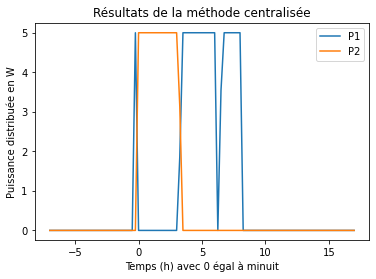

In [ ]:
plt.plot([i*0.25+17-24 for i in range(N)],res.x[:N], label="P1")
plt.plot([i*0.25+17-24 for i in range(N)],res.x[-N:], label="P2")
plt.xlabel("Temps (h) avec 0 égal à minuit")
plt.ylabel("Puissance distribuée en W")
plt.title("Résultats de la méthode centralisée")
plt.legend()
plt.show()


### Analyse des résultats obtenus

Bien que la voiture 1 arrive avant la seconde, on remarque que c'est bien la voiture 2 qui charge totalement en premier puis laisse place à la voiture 1 pour charger à sa suite. 
Cette solution centralisée ne semble donc pas la plus pertinente puisque elle ne prend pas en compte l'ordre d'arrivée des véhicules et ne permet pas de chargerv les deux véhicules simultanément avec un partage de la puissance totale. On observe tout de même que la voiture 1 charge plus longtemps que la voiture 2, ce qui est cohérent avec les charges initiales respectives des véhicules.

$\\$

$\underline{Question ~ 8}$

Comme précisé ci-dessus, la solution centralisée ne prend pas en compte l'ordre d'arrivée des véhicules et ne peut pas charger plusieurs véhicules simultanément. En effet, le problème d'optimisation est résolu pour les deux véhicules liés et il manque des contraintes personnalisées pour chacun des véhicules afin que l'optimiseur puisse donner un résultat plus en accord avec ce que l'on voudrait. 

$\\$

$\underline{Question ~ 9~a}$

Posons 
$$
e_i = \begin{pmatrix}
0 \\
. \\
0 \\
1 \\
0 \\
. \\
0
\end{pmatrix}, 
$$



On cherche désormais à mininmiser la fonction :
$$
f(P) = \sum_{j=1}^{N_V} \sum_{i=0}^{N}\left(\Delta t c_{i} P_{j, i}+\varepsilon\left(P_{j, i}\right)^{2}\right)
$$
On peut décomposer cette fonction telle que 
$$
f(P) = \sum_{j=1}^{N_V} f_{j}(x_j)
$$
Avec $x_j = (P_{j,i})_{i \in \llbracket 0, N \rrbracket}$
$\\$ 

Et $f_{j}(x_j) = \sum_{i=0}^{N} [\Delta t \space c_{i} \space x_j.e_i +\varepsilon\left(x_j.e_i\right)^{2}]$ 

On peut définir les contraintes comme:

$ (-P_{j,i} \leq 0) $ A VOIR SI BESOIN DE CETTE CONTRAINTE -> ON GARDE OU PAS ?


Pour les contraintes égalité, nous n'avons pas besoin de les composer puisque qu'elles ne dépendent à chaque fois que de la valeur d'intérêt.

$$ c_{eq}^j(x_j)=(1,\dots,1)^T x_j-\alpha_j =0$$

où $ \alpha_j = \frac{\bar{Q}-Q_j^{in}}{\Delta t \beta} $ 

On peut exprimer cette expression comme deux inégalités:
$$(1,\dots,1)^T x_j-\alpha_j \leq 0 $$
$$ -(1,\dots,1)^Tx_j+\alpha_j \leq 0 $$

Pour finir, on doit décomposer les contraintes inéqualité comme dans l'annexe car elle ne dépendent pas que de la valeur d'intérêt mais également des autres. 
On choisit une répartion uniforme de $\bar{P}$ pour ne pas privilégier un véhicule par rapport à un autre.
$$c_{in}^j(x_j)=x_j-\frac{1}{N_v}(\bar{P}) \leq 0$$

où $ (\bar{P})$ est un vecteur de dimension $N$.


On peut donc synthétiser tout cela dans le vecteur:

$$c_j(x)=c_j(x_j)=\begin{pmatrix}
(1,\dots,1)^T x_j-\alpha_j \\
-(1,\dots,1)^T x_j-\alpha_j \\
x_j-\frac{1}{N_v}(\bar{P})
\end{pmatrix} \leq 0$$

où les dimensions de chaque sous-vecteur sont respectivement:
$1$,$1$,$N$.

Donc 

$$c(x)=\sum_{j=1}^{N_v}\begin{pmatrix}
(1,\dots,1)^T x_j-\alpha_j \\
-(1,\dots,1)^T x_j-\alpha_j \\
x_j-\frac{1}{N_v}(\bar{P})
\end{pmatrix} $$





Le problème décentralisée peut donc s'écrire de la façon suivante: 

Pour tout $j \in \left\{ 1, \dots, N_v  \right\} $,
$$ \min_{x_j ~/ ~c_j(x)=c_{ij}(x_j) ~\leq ~ 0 ~pour ~i \in J_j} [f_j(x_j)+\lambda^T c_j(x_j)]$$

où $J_j$ est l'ensemble des indices des contraintes qui ne font intervenir que la variable $x_j$ et $I$ le complémentaire de $J= \bigcup_{l=1}^{N_v} J_l $

Algorithme :

Initialisation : on choisit le multiplicateur $\lambda_0$ et le pas $\rho$
$\\$

Décomposition : on résout les $N_v$ problèmes et on note $x_j^k$ les solutions respectives.
$$
\min_{x_j ~/ ~c_j(x)=c_{lj}(x_j) ~\leq ~ 0 ~pour ~l \in J_j} [ \sum_{i=0}^{N} \Delta t \space c_{i} \space x_j. e_i +\varepsilon \left(x_j .e_i \right)^{2} + \sum_{l \in I} (\lambda_l^{k})^{\space T}c_{lj}(x_j)] 
$$

Coordination: Mise à jour du coefficient de Lagrange:
$$
\lambda_l^{k+1}=\max \left\{ \lambda_l^{k}+ \rho(c_{l1}(x_1^k)+c_{l2}(x_2^k)+ \dots + c_{lN_v}(x_{N_v}^k))~, ~ 0\right\}, ~ l \in I
$$


$\underline{Question  ~9 ~ b}$

L'avantage de l'algorithme de décomposition/coordination est tout d'abord de réduire la dimension du problème de départ. Dans le cas de problème de grande échelle, il paraît plus évident de traiter un grand nombre de problèmes avec peu de dimension. Par ailleurs, la méthode de résolution de plus petits systèmes est plus compréhensible pour l'opérateur. La méthode permet également de résoudre les différents problèmes et de mettre en commun les informations différentes lors de la coordination: on décentralise donc les décisions de l'optimiseur contrairement à la méthode précédente.

Contrairement au problème centralisée, certains sous-problèmes pourraient ne pas avoir de solution admissible si les contraintes des différents sous-problèmes interfèrent entre-elles, d'où l'utilité de les séparer comme on l'a fait.
Par ailleurs, les contraintes sont plus importantes que dans le cas centralisé (on multiplie par le nombre de sous-problèmes).

$\underline{Question  ~9 ~ c}$

On se place dans le même cas qu'à la question 7. On a donc les mêmes données.

### Données

In [ ]:
ccr=1
cpl=3/2
Qbar=50
Pbar=5
t0=17
delta_t=0.25
N=24*4+1
Nv=2
T=[t0+i*delta_t for i in range(N)]
Q1_i=0.3*Qbar
Q2_i=0.5*Qbar
t1_i=18
t2_i=18.5
t1_f=32
t2_f=33

### Nouvelles données

In [ ]:
rho=1
epsilon=1
N_iter=100

Déterminons le multiplicateur de Lagrange initial $\lambda_0$.

In [ ]:
def f(x_j):
    sum=0
    for i in range(N):
        sum+= delta_t*c[i]*x_j[i]+epsilon*(x_j[i])**2 # c est défini dans la question 7
    return sum

def c_j(x_j,Qini_j):
    res= np.zeros(N+2)
    vec1=np.ones(N)
    alpha_j=1/(delta_t*beta1)*(Qbar-Qini_j)
    res[0]=vec1@x_j-alpha_j 
    res[1]=-vec1@x_j+alpha_j 
    for i in range(2,N+2):
        res[i]=x_j[i-2]-1/Nv * Pbar


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Implémentation de l'algorithme

In [7]:
lambda_0=np.zeros(N+2)
k=1
lambda_k=lambda_0
lambda_k1=
while (k<=N_iter and np.abs(lambda_k1-lambda_k)>1e-1):

SyntaxError: invalid syntax (159695592.py, line 4)